# Detect Water Through GFM

In [7]:
from shapely import box
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from flood_finder.floodprocessor import FloodProcessor
from flood_finder.reporter import ProcessorReporter
from flood_finder.waterfinder import WaterFinder
from owslib.wms import WebMapService


## Define the ROI

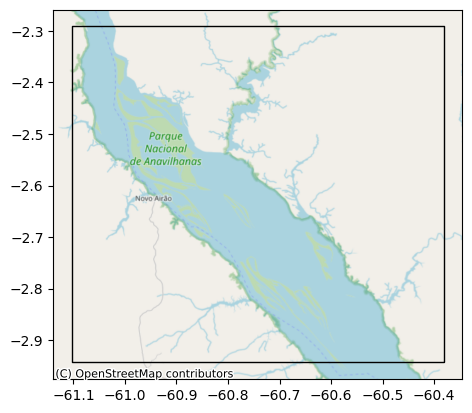

In [5]:
# Anavilhanas area
bbox = (-61.10276214,  -2.94326633, -60.38112221,  -2.29131376)

gdf = gpd.GeoDataFrame(geometry=[box(*bbox)])
ax = gdf.plot(facecolor='none')
cx.add_basemap(ax=ax, crs='epsg:4326', source=cx.providers.OpenStreetMap.Mapnik)

## Use the GFM webservice

In [9]:
wms_t = WebMapService(WaterFinder.GFM_URL)

In [12]:
layers = list(wms_t.contents)

In [13]:
layers

['advisory_flags_group_layer',
 'affected_landcover_group_layer',
 'affected_population_group_layer',
 'exclusion_mask_group_layer',
 'observed_flood_extent_group_layer',
 'observed_water_extent_group_layer',
 'reference_water_mask_group_layer',
 'uncertainty_values_group_layer',
 'advisory_flags',
 'advisory_flags_footprint_geom',
 'affected_landcover',
 'affected_landcover_footprint',
 'affected_population',
 'affected_population_footprint',
 'exclusion_mask',
 'exclusion_mask_footprint',
 'observed_flood_extent',
 'observed_flood_extent_footprint',
 'observed_water_extent',
 'observed_water_extent_footprint',
 'reference_water_mask',
 'reference_water_mask_footprint',
 'sentinel_1_footprint',
 'sentinel_1_footprint_old',
 'sentinel_1_metadata',
 'sentinel_1_schedule',
 'uncertainty_values',
 'uncertainty_values_footprint']

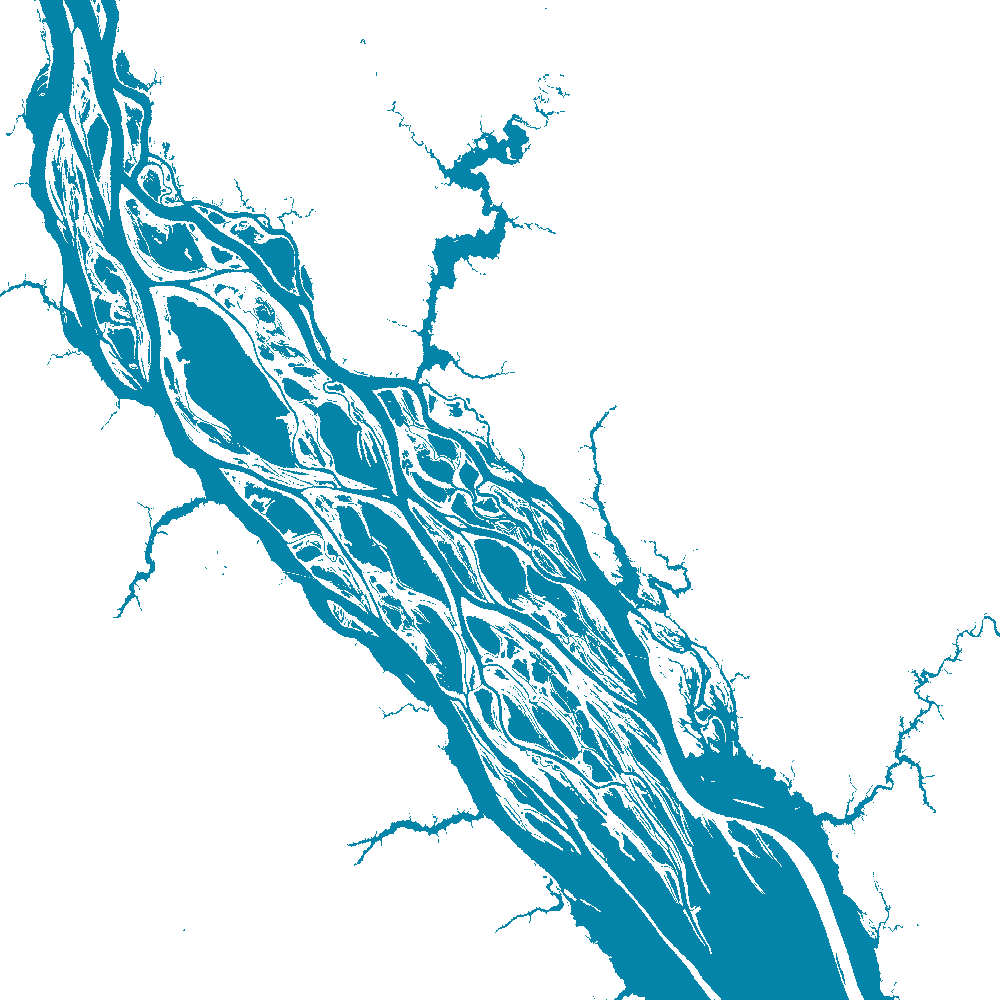

In [25]:
img = WaterFinder.get_wms_img(
    time_range='2023-10-1/2023-12-30',
    layer='observed_water_extent',
    bbox=bbox,
    size=(1000, 1000),
    wms_t = wms_t
)

img

![](<attachment:WhatsApp Image 2024-03-01 at 10.15.30_e3e784e1.jpg>)

![WhatsApp Image 2024-03-01 at 10.15.30_e3e784e1.jpg](<attachment:WhatsApp Image 2024-03-01 at 10.15.30_e3e784e1.jpg>)
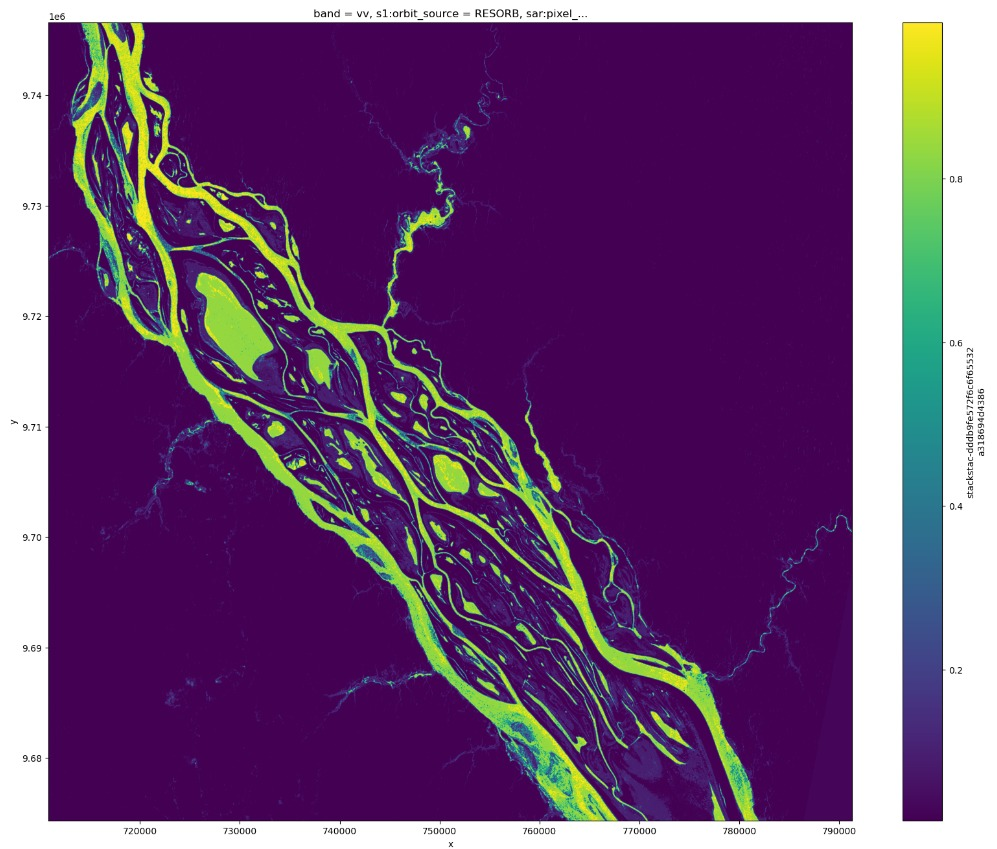

Comparing the GFM Water Extent with the very dry reality we can be certain GFM is not detecting water, just floods. THe algorithms look for standard deviations from the mean signal, and the observed water extent is the baseline water mask for that month. This is not a layer that should be used as water detection. 